# k-Nearest Neighbors

In this notebook, we briefly introduce the k-NN model, then apply it on the CVDs dataset and diabetes dataset.

---

## Introduction

The [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm (k-NN) is a non-parametric supervised learning method. It can be used for classification and regression.

---

## Algorithm

In the k-NN algorithm, we first assign a $\mathcal{k}$ value. For both classification and regression cases, the input consists of $\mathcal{k}$ nearest examples in the dataset. The output depends on whether k-NN is used for classification or regression: 
* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

---

## Advantages and Disadvantages 

### Advantages
* The algorithm is simple and easy to implement.
* There’s no need to build a model, tune several parameters, or make additional assumptions.
* The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).


### Disadvantages
* The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

---

## k-NN Classification

As what we did before, we import the libraries and data set.

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Set theme for plotting
sns.set_theme()

In [2]:
# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

# Data Preprocessing by onehot encoding
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

# Standardize the data
df.Age = preprocessing.scale(df.Age)
df.RestingBP = preprocessing.scale(df.RestingBP)
df.MaxHR = preprocessing.scale(df.MaxHR)
df.Cholesterol = preprocessing.scale(df.Cholesterol)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,1.0,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,1.5,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.0,0,0,1,0,1,0,0,1


We create the training and testing set.

In [3]:
X = df.drop('HeartDisease',axis=1).to_numpy()
y = df.HeartDisease.to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$

In [4]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

With our distance function, we are now ready to write a function to compute the $k$-nearest neighbors to a given point. This is done in the code cell below. 

In [5]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Now let's try the ```k_nearest_neighbors``` function on the last observation of testing set and find the 5 data points closest to it from the training set.

In [6]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([ 0.68831845,  0.        , -1.64269366,  1.09033547,  0.        ,
          0.91134991,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  1.        ]),
  0,
  1.119887503386009],
 [array([ 0.15795389,  1.        , -1.21035628,  0.71530535,  0.        ,
          0.91134991,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  1.        ,  0.        ,  0.        ,  1.        ]),
  0,
  1.3956314626574324],
 [array([0.05188098, 0.        , 0.14069803, 0.9622764 , 1.        ,
         1.30433183, 0.        , 0.        , 0.        , 1.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ]),
  0,
  1.3970544059758845],
 [array([ 0.05188098,  0.        , -1.31844062,  0.62383458,  0.        ,
          1.18643726,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  1.        ]),
  0,
  1.443975187681677],
 [array([

Observe that within the 5 closest points, 4 of them have label 0. Now let's see the true label of the last observation in the testing set.

In [7]:
y_test[-1]

0

Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning. This is shown in the code cell below. 

In [8]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

We can examine the established ```KNN_Predict``` function by running the cell below.

In [9]:
KNN_Predict(X_test[-1], X_train, y_train, 5)

0

Next we write a function to compute the classification error.

In [10]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        error += test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k)
    return error/len(test_features)

For k-NN with $k = 5$, the classification error is shown as below.

In [11]:
classification_error(X_test, y_test, X_train, y_train, 5)

0.14130434782608695

Now let's do an experiment with different $k$ values in order to find the optimal value of $k$. 

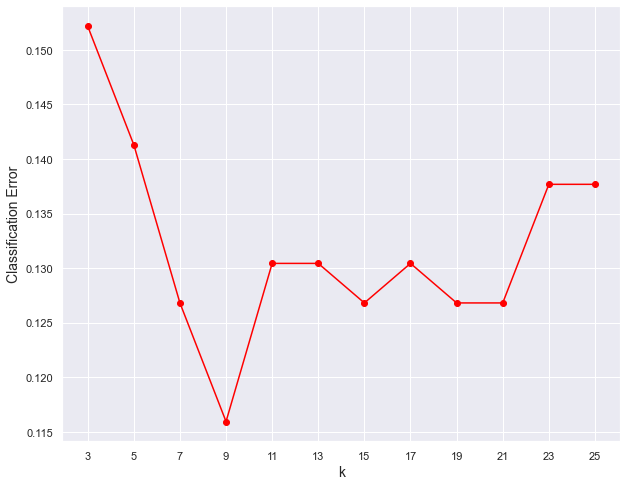

In [12]:
## Choosing the right value for K
possible_k = [x for x in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

From the graph above, we would like to choose $k = 9$, as the k-NN model has the smallest classification error rate.

In [13]:
1 - classification_error(X_test, y_test, X_train, y_train, 9)

0.8840579710144928

The accuracy for k-NN model is similar to the logistic regression model and better than the MLP. Now let's perform k-NN by using Scikit-Learn.

In [14]:
## try using Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 9)

# fit the KNN model 
clf.fit(X_train, y_train)

# Calculate the accuracy
clf.score(X_test, y_test)

0.8840579710144928

cf_matrix = [[ 96  16]
 [ 16 148]] 



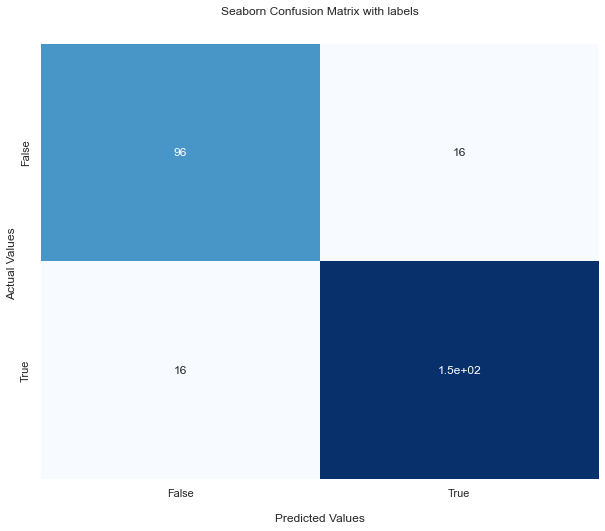

In [15]:
# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [16]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       112
           1       0.90      0.90      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



From the result above, we can see that the k-Nearest Neighbors model performs well on the CVDs dataset. The performance of k-NN is very similar to the logistic regression model, a little bit better than the MLP, and better than the single neuron perceptron model.

---

## k-NN Regression

In this part, we will apply k-NN regression on diabetes dataset from scikit-learn. First, let's look at the diabetes data.

In [17]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data,columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [18]:
print(f'np.shape(df) = {np.shape(df)} \n')
missing_cnt = df.isnull().sum()
print(missing_cnt)

np.shape(df) = (442, 11) 

age       0
sex       0
bmi       0
bp        0
tc        0
ldl       0
hdl       0
tch       0
ltg       0
glu       0
target    0
dtype: int64


The dimension of diabetes data set is (442, 12). There is no missing value in the diabetes data. Next we will split the data into training set and testing set.

In [19]:
X = df.drop('target',axis=1).to_numpy()     # the response variables
y = df.target.to_numpy()                    # the exploratory variable

# scale the data
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=42)

Rather than regress on all the response varaibles, we first do the k-NN regression on the first 4 variables. The k we chose is 5.

In [20]:
y_pred = [KNN_Predict(point, X_train[:,:4], y_train, 5, regression=True) for point in X_test[:,:4]]

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"R^2 = {round(r2_score(y_test, y_pred), 3)}")

MSE = 0.6474391097366122
R^2 = 0.289


The $R^2$ value is very low, meaning that the data does not fit the regression model well. Now let's try regressing on all the attributes. 

In [22]:
y_pred = [KNN_Predict(point, X_train, y_train, 5, regression=True) for point in X_test]
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"R^2 = {round(r2_score(y_test, y_pred), 3)}")

MSE = 0.5433693825011081
R^2 = 0.403


We can see that the MSE decreases and the $R^2$ increases. Now let's try to do some experiments with different $k$ values.

Text(0.5, 1.0, 'adjusted $R^2$ for different k')

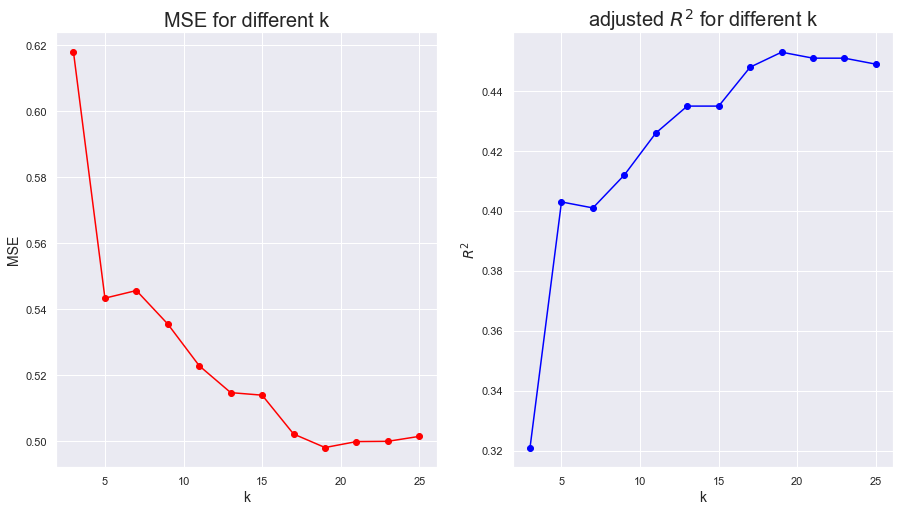

In [23]:
possible_k = [x for x in range(3, 26, 2)]
MSE = []
R2 = []
for k in possible_k:
    y_pred = [KNN_Predict(point, X_train, y_train, k, regression=True) for point in X_test]
    mse = mean_squared_error(y_test, y_pred)
    MSE.append(mse)
    r2 = round(r2_score(y_test, y_pred), 3)
    R2.append(r2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.scatter(possible_k, MSE, color = "red")
ax1.plot(possible_k, MSE, color = 'red')
ax1.set_xlabel("k", fontsize = 14)
ax1.set_ylabel("MSE", fontsize = 14)
ax1.set_title('MSE for different k', fontsize = 20)

ax2.scatter(possible_k, R2, color = "blue")
ax2.plot(possible_k, R2, color = 'blue')
ax2.set_xlabel("k", fontsize = 14)
ax2.set_ylabel("$R^2$", fontsize = 14)
ax2.set_title('adjusted $R^2$ for different k', fontsize = 20)

By increasing the $k$ value, the MSE decreases and the $R^2$ increases. However the maximum value of adjusted $R^2$ for different k values is no more than 0.50. Therefore, in this case, k-NN is not an ideal model to do the regression. 